### Module 8: Recommendation Systems

Here is a table of 1-5 star ratings for five movies (M, N, P. Q. R) by three raters (A, B, C).

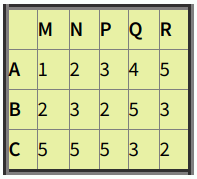

In [2]:
from IPython.display import Image
Image(filename='ratings.png')

Normalize the ratings by subtracting the average for each row and then subtracting the average for each column in the resulting table. Then, identify the true statement about the normalized table.

In [97]:
import numpy as np

ratings = np.array([[1, 2, 3, 4, 5],
                    [2, 3, 2, 5, 3],
                    [5, 5, 5, 3, 2]])

row_means = np.mean(ratings, axis=1)
# add new axis: (3,) => (3, 1)
row_means = row_means[:,np.newaxis]
normalized_ratings = ratings - row_means

col_means = np.mean(normalized_ratings, axis=0)
normalized_ratings = normalized_ratings - col_means
print(normalized_ratings)

[[-1.33333333 -1.          0.          0.33333333  2.        ]
 [-0.33333333  0.         -1.          1.33333333  0.        ]
 [ 1.66666667  1.          1.         -1.66666667 -2.        ]]


Below is a table giving the profile of three items.

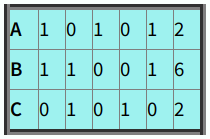

In [4]:
Image(filename='profiles.png')

The first five attributes are Boolean, and the last is an integer "rating." Assume that the scale factor for the rating is α. Compute, as a function of α, the cosine distances between each pair of profiles. For each of α = 0, 0.5, 1, and 2, determine the cosine of the angle between each pair of vectors.

In [5]:
item_labels = ['A', 'B', 'C']

item_profiles = np.array([[1, 0, 1, 0, 1, 2],
                          [1, 1, 0, 0, 1, 6],
                          [0, 1, 0, 1, 0, 2]])

scale_factors = [0, 0.5, 1, 2]

def magnitude(v):
    return np.sqrt(v @ v.T)

def cosine_angle(v1, v2):
    return (v1 @ v2) / (magnitude(v1) * magnitude(v2)) 

for alpha in scale_factors:
    for i in range(0, len(item_profiles)):
        for j in range(i + 1, len(item_profiles)):
            item1 = np.copy(item_profiles[i])
            item2 = np.copy(item_profiles[j])
            item1[-1] *= alpha
            item2[-1] *= alpha
            cos_sim = cosine_angle(item1, item2)
            print('Cosine angle between {} and {}, with scale factor {}: {:.2}'.format(
                item_labels[i],
                item_labels[j],
                alpha,
                cos_sim,
            ))

Cosine angle between A and B, with scale factor 0: 0.67
Cosine angle between A and C, with scale factor 0: 0.0
Cosine angle between B and C, with scale factor 0: 0.41
Cosine angle between A and B, with scale factor 0.5: 0.72
Cosine angle between A and C, with scale factor 0.5: 0.29
Cosine angle between B and C, with scale factor 0.5: 0.67
Cosine angle between A and B, with scale factor 1: 0.85
Cosine angle between A and C, with scale factor 1: 0.62
Cosine angle between B and C, with scale factor 1: 0.85
Cosine angle between A and B, with scale factor 2: 0.95
Cosine angle between A and C, with scale factor 2: 0.87
Cosine angle between B and C, with scale factor 2: 0.95


Below is a utility matrix representing ratings by users A, B, and C for items a through h.

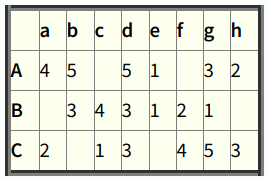

In [6]:
Image(filename='utilities.png')

Treat ratings of 3, 4, and 5 as 1 and 1, 2, and blank as 0. Compute the Jaccard distance between each pair of items. Then, cluster the items hierarchically into four clusters, using the Jaccard distance. When a cluster consists of more than one item, take the distance between clusters to be the minimum over all pairs of items, one from each cluster, of the Jaccard distance between those items. Break ties lexicographically. That is, sort the items that would be merged alphabetically, and merge those clusters whose resulting set would be first alphabetically. Then, identify one of the resulting clusters in the list below.

Note: if you are not familiar with hierarchical clustering, you might want to wait until Video 59 in Week 5, or read Sect. 7.2 of the MMDS book.

In [44]:
from collections import defaultdict
from first import first

ITEM_LABELS = [letter for letter in 'abcdefgh']

ratings = np.array([[4, 5, 0, 5, 1, 0, 3, 2],
                    [0, 3, 4, 3, 1, 2, 1, 0],
                    [2, 0, 1, 3, 0, 4, 5, 3]])

TARGET_NUM_CLUSTERS = 4

boolean_ratings = np.copy(ratings)
boolean_ratings[boolean_ratings <= 2] = 0
boolean_ratings[boolean_ratings >= 3] = 1

def jaccard_distance(v1, v2):
    intersection = np.logical_and(v1, v2)
    union = np.logical_or(v1, v2)
    return 1 - np.sum(intersection) / np.sum(union)

def jaccard_distance_dict(items):
    jaccard_distances = defaultdict(defaultdict)

    for i in range(0, len(items)):
        for j in range(i + 1, len(items)):
            item1, label1 = items[i], ITEM_LABELS[i]
            item2, label2 = items[j], ITEM_LABELS[j]
            jaccard_dist = jaccard_distance(item1, item2)
            jaccard_distances[label1][label2] = jaccard_dist

    return jaccard_distances

def item_label(item):
    for idx, el in enumerate(ITEMS):
        if item is el:
            return ITEM_LABELS[idx]

def cluster_distance(cluster1, cluster2):
    min_distance = None

    for item1 in cluster1:
        for item2 in cluster2:
            label1 = min(item_label(item1), item_label(item2))
            label2 = max(item_label(item1), item_label(item2))
            distance = 0 if label1 == label2 else JACCARD_DISTANCES[label1][label2]
            if min_distance is None or distance < min_distance:
                min_distance = distance

    return min_distance

def closest_clusters(clusters):
    min_distance = None
    selected_clusters = None, None

    for i in range(0, len(clusters)):
        for j in range(i + 1, len(clusters)):
            cluster1 = clusters[i]
            cluster2 = clusters[j]
            distance = cluster_distance(cluster1, cluster2)
            if min_distance is None or distance < min_distance:
                min_distance = distance
                selected_clusters = cluster1, cluster2

    return list(selected_clusters)

def merge_clusters(clusters, closest_clusters):
    copy = [c for c in clusters]
    for i, c in enumerate(copy):
        for cc in closest_clusters:
            if c is cc:
                del copy[i]
                break
    return copy + [[c for cc in closest_clusters for c in cc]]

ITEMS = np.split(boolean_ratings, 8, axis=1)
JACCARD_DISTANCES = jaccard_distance_dict(ITEMS)

# a cluster is a list of the items in it
clusters = [[item] for item in ITEMS]
num_clusters = len(clusters)

while num_clusters > TARGET_NUM_CLUSTERS:
    clusters_to_merge = closest_clusters(clusters)
    clusters = merge_clusters(clusters, clusters_to_merge)
    num_clusters = len(clusters)

for item in ITEMS:
    print('{}: {}'.format(item_label(item), item.tolist()))
    
for idx, cluster in enumerate(clusters):
    items = [item_label(item) for item in cluster]
    print('Cluster {}: {}'.format(idx + 1, items))

a: [[1], [0], [0]]
b: [[1], [1], [0]]
c: [[0], [1], [0]]
d: [[1], [1], [1]]
e: [[0], [0], [0]]
f: [[0], [0], [1]]
g: [[1], [0], [1]]
h: [[0], [0], [1]]
Cluster 1: ['c']
Cluster 2: ['e']
Cluster 3: ['f', 'h']
Cluster 4: ['a', 'g', 'b', 'd']


We want to do an approximate UV-decomposition of the matrix M =

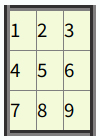

In [8]:
Image(filename='matrix4.png')

We shall use only a single column for U and a single row for V, so the goal is to make the product UV as close as possible to M. Initially, we shall set V to [5,5,5] and make the entries of U unknown. Then in the first step, we choose the values of x, y, and z that minimize the root-mean-square error (RMSE) between the product

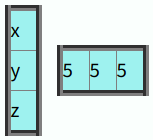

In [9]:
Image(filename='product.png')

and the matrix M.

Find the values of x, y, and z that minimize the RMSE.

In [82]:
M = np.array([[1, 2, 3],
              [4, 5, 6],
              [7, 8, 9]])

avg_val = np.sum(M) / np.count_nonzero(M)

U = np.array([avg_val] * 3).reshape(3, 1)
V = np.array([5, 5, 5]).reshape(1, 3)

def rmse(m1, m2):
    sum_sq_errors = np.sum(np.square(m1 - m2))
    return np.sqrt(sum_sq_errors / m1.size)

P = U @ V
min_rmse = rmse(M, P)
optimals = [avg_val] * 3

# brute-force solution
for x in range(0, 10):
    for y in range(0, 10):
        for z in range(0, 10):
            U = np.array([x, y, z]).reshape(3, 1)
            P = U @ V
            error = rmse(M, P)
            if error < min_rmse:
                min_rmse = error
                optimals = [x, y, z]
                
print('The optimal values of U are: {}, with RMSE {:.2}'.format(optimals, min_rmse))

The optimal values of U are: [0, 1, 2], with RMSE 1.8
